In [1]:
# Importing necessary stuff
import sklearn as sk
from sklearn import metrics
from sklearn.metrics import roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
# Read data, pay attention separator is \t, not comma
data = pd.read_csv("lab2_data.csv", sep='\t')

# Firstly, I've saved document after opening it in OpenOffice Calc and got some... bad stuff instead of correct data
# So I've used line below to see if data was read correctly and there were no changes to original file.
# Now it's commented not to make you scrolling to much.
# data.loc[:,'churn':'churn_pred_prob']

In [36]:
# Yes, indeed, so now - formatting it into np.arrays
real = np.array(data.loc[:,'churn'])
pred = data.loc[:, 'churn_pred_prob'].replace(r',', '.', regex=True)
# Now the predicted probability values are considered as strings, so let's change it to float
pred = np.array(pred.astype('float64'))

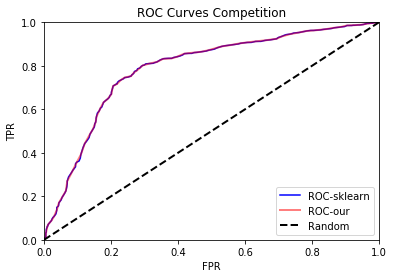

In [37]:
# Now we are using sklearn roc_curve algorithm, before everything else, to see how easy it is, using framework
tpr, fpr, thresholds = metrics.roc_curve(real, pred, pos_label=0)


# Then calculating by ourselves
# Let's create thresholds
TS = np.linspace(min(pred), max(pred), 80)

# Below are the variables declarations. Used to it since imperative programming.
# Lists for our True and False positive ratios
TPR = []
FPR = []

# Also, some assistive variables to calculate accuracy, recall and precision afterwords:
tpg = 0 # these are True/False Positive/Negative Global, so the sum for all tresholds
fpg = 0
fng = 0
tng = 0

# Calculating number of real positive and negative outcomes for ratios:
P = sum(real)
N = len(real) - P


# Just calculting number of false positive and true positives for every threshold. Global values are holded.
for (i, T) in enumerate(TS):
    FP = 0
    TP = 0
    for i in range(0, len(pred)):
        if pred[i] > T:
            if real[i] == 1:
                TP += 1
                tpg += 1
            if real[i] == 0:
                FP += 1
                fpg += 1
        elif pred[i] < T:
            if real[i] == 1:
                fng += 1
            if real[i] == 0:
                tng += 1
    FPR.append(FP/float(N))
    TPR.append(TP/float(P))
    

# Plotting results
plt.title('ROC Curves Competition')
plt.ylabel('TPR')
plt.xlabel('FPR')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label='ROC-sklearn', c='blue')
plt.plot(FPR, TPR, c = 'red', label='ROC-our', linewidth = 2, alpha = 0.5)
plt.plot([0, 1], [0, 1], lw=2, ls='--', c='black', label='Random')
plt.legend(loc=4)
plt.show()

# We see lines are just so close, that I couldn't see one if there was no alpha channel.

In [38]:
# Integrating the curve for AUC value
AUC_sk = np.trapz(tpr, fpr)
print('AUC for Sklearn =', AUC_sk * 100,'%')
AUC_own = np.trapz(TPR, FPR)
print('AUC for our own =', -AUC_own * 100,'%')
# For real - not a big differance, which is obsious from curves

AUC for Sklearn = 78.7281402032 %
AUC for our own = 78.6244372648 %


In [31]:
# And finally evaluate accuracy, precision and recall for model:
accuracy = (tpg + tng) / (tpg + fpg + fng + tng)
print('Accuracy =', accuracy * 100)
precision = tpg / (tpg + fpg)
print('Precision =', precision * 100)
recall = tpg / (tpg + fng)
print('Recall =', recall * 100)

# Not a very good model, I would say. However, it depends on what was the task

Accuracy = 61.336895888998264
Precision = 62.47339693938122
Recall = 64.67572955230145


In [40]:
# By some reasons roc_curve method worked not as documented.
# Would very appreciate, if you explain me why tpr was returned before fpr